In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bank.csv to bank.csv


**1-IMPORT and INITIAL ANALYSIS**

In [ ]:
print("\n Dataset information:")
df.info()


 Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
import pandas as pd
print("\n First 5 rows:")
df = pd.read_csv("bank.csv")
df.head()



 First 5 rows:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
# Check class balance
print(df['deposit'].value_counts())

deposit
no     5873
yes    5289
Name: count, dtype: int64


In [ ]:
print("\n Missing values:")
print(df.isnull().sum())


 Missing values:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


In [ ]:
print("\n Statistical summary:")
df.describe()


 Statistical summary:


,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [ ]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,11162,11162,11162,11162,11162,11162,11162,11162,11162,11162
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2566,6351,5476,10994,5881,9702,8042,2824,8326,5873



 Visualizing numeric features...


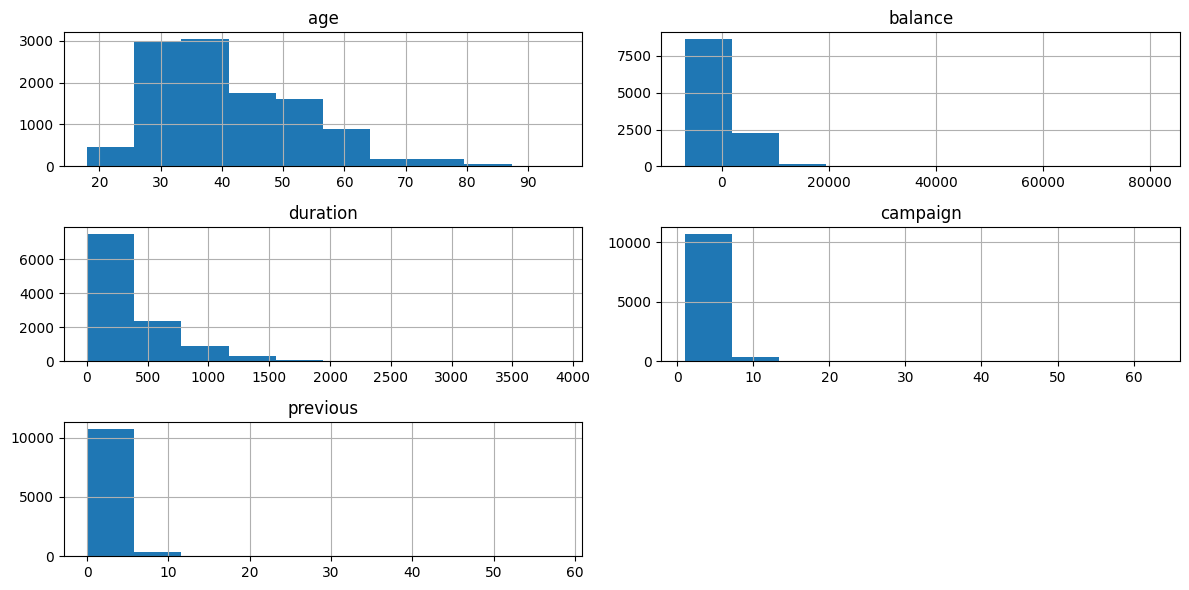

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
print("\n Visualizing numeric features...")
df[['age','balance','duration','campaign','previous']].hist(figsize=(12, 6))
plt.tight_layout()
plt.show()


 Correlation heatmap...


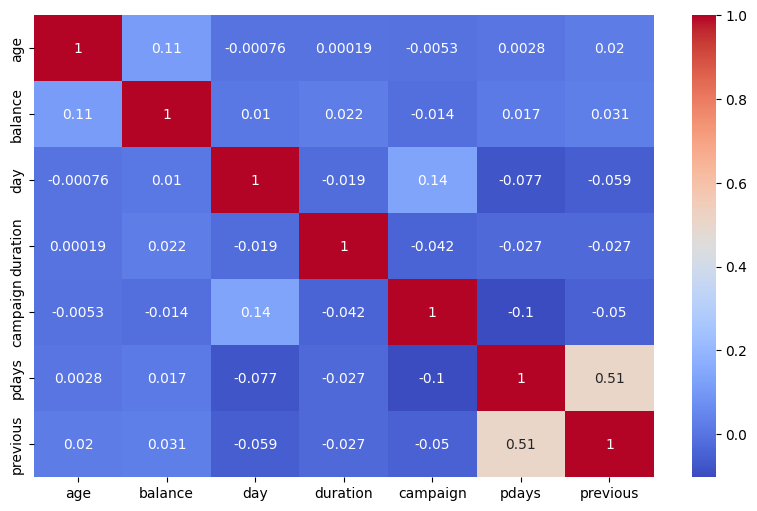

In [ ]:
print("\n Correlation heatmap...")
plt.figure(figsize=(10, 6))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.show()


 Countplot for job


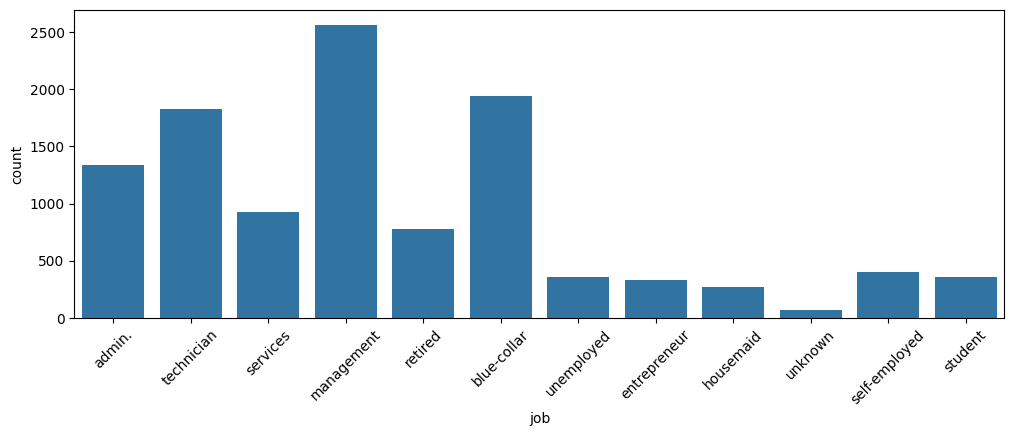

In [ ]:
print("\n Countplot for job")
plt.figure(figsize=(12,4))
sns.countplot(data=df, x='job')
plt.xticks(rotation=45)
plt.show()

  2- CLEANING THE DATA

In [ ]:
# Replace "unknown" with NaN
df = df.replace("unknown", pd.NA) # Corrected: Removed inplace=True to prevent df from becoming None

# Fill missing categorical with mode
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    column_mode = df[col].mode()
    if not column_mode.empty:
        df[col] = df[col].fillna(column_mode[0])

# Handle duplicates
df = df.drop_duplicates()

# One-Hot Encoding
df = pd.get_dummies(df, drop_first=True)
print("\n Cleaning complete")

df.head()



 Cleaning complete


,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,deposit_yes
0,59,2343,5,1042,1,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,True
1,56,45,5,1467,1,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,41,1270,5,1389,1,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,True
3,55,2476,5,579,1,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,True
4,54,184,5,673,2,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,True


In [ ]:
# Convert month to ordered categorical (useful if you want numeric ordering later)
month_order = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
if 'month' in df.columns:
    df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)
    # convert to string again so OneHotEncoder treats it as categorical (or we can use ordinal, but we OHE below)
    df['month'] = df['month'].astype(str)


In [ ]:
# Scale numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols = ['age','balance','duration','campaign','pdays','previous','day']
df[num_cols] = scaler.fit_transform(df[num_cols])

# Encode target
# After one-hot encoding in v8YxnVYbQTp5, 'deposit' becomes 'deposit_yes' (boolean True/False).
# Convert this boolean column to integer (1/0) and rename it to 'deposit'.
if 'deposit_yes' in df.columns:
    df['deposit'] = df['deposit_yes'].astype(int)
    df = df.drop(columns=['deposit_yes'])
# Fallback: if 'deposit_yes' does not exist (e.g., if one-hot encoding was skipped)
# and 'deposit' still exists as an object type, map 'yes'/'no'.
elif 'deposit' in df.columns and df['deposit'].dtype == 'object':
    df['deposit'] = df['deposit'].map({'yes':1, 'no':0})


**3- Build Deep Learning Model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
# Split data
X = df.drop('deposit', axis=1)
y = df['deposit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Build model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


280/280 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6743 - loss: 0.5933 - val_accuracy: 0.8088 - val_loss: 0.4142
Epoch 2/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.8136 - loss: 0.4275 - val_accuracy: 0.8155 - val_loss: 0.3972
Epoch 3/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8288 - loss: 0.4040 - val_accuracy: 0.8182 - val_loss: 0.3892
Epoch 4/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8243 - loss: 0.3958 - val_accuracy: 0.8231 - val_loss: 0.3843
Epoch 5/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8299 - loss: 0.3971 - val_accuracy: 0.8249 - val_loss: 0.3838
Epoch 6/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8390 - loss: 0.3798 - val_accuracy: 0.8191 - val_loss: 0.3819
Epoch 7/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8307 - loss: 0.3864 - val_accuracy: 0.8249 - val_loss: 0.3799
Epoch 8/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8423 - loss: 0.3661 - val_accuracy: 0.8227 - va

**4- Evaluate Model**

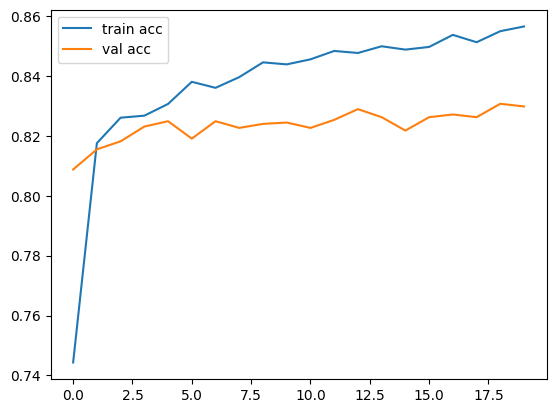

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8164 - loss: 0.4003
Test Accuracy: 0.83


In [ ]:
import matplotlib.pyplot as plt

# Plot training history
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

# Evaluate on test set
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.2f}")